In [86]:
import csv 
import numpy as np
import matplotlib.pyplot as plt


In [87]:
def load_csv(filename):
    with open(filename+'.csv', 'r') as csvfile: 
        # creating a csv reader object 
        csvread = csv.reader(csvfile)
        fields=next(csvread)
        X_train = [row for row in  csvread]
    X_train = np.array(X_train , dtype=float).T
    return X_train


In [88]:
train  = load_csv("Train")
test = load_csv("Test")
train = np.array(train)
test  = np.array(test)
X_train = train[:5,:800]
X_dev  = train[:5,800:]
Y_train = train[5:,:800]
Y_dev = train[5:,800:]
X_test = test
print(X_train.shape,X_test.shape,Y_train.shape,X_dev.shape,Y_dev.shape)


(5, 800) (5, 400) (1, 800) (5, 800) (1, 800)


In [96]:
def initialize_params(n):
    parameters={}
    parameters['w'] = np.random.randn(1,n)*100
    parameters['b'] =0
    return parameters

In [97]:
def forward_prop(parameters,X):
    return np.dot(parameters['w'],X)+parameters['b']


In [98]:
def compute_cost (Y_p,Y):
    return np.mean((Y_p-Y)**2)/2


In [99]:
def back_prop_update(parameters,X,Y,Y_p,lr):
    m = X.shape[1]
    dY = Y_p-Y
    dw = np.dot(dY,X.T)/m
    db = np.sum(dY)/m
    parameters['w'] = parameters['w']- lr*dw
    parameters['b']=parameters['b']-lr*db
    return parameters,dw,db

In [100]:
#using gradient descent
def model(X,Y,lr=0.09,num_iterations=3000):
    parameters = initialize_params(X.shape[0])
    costs = []
    for i in range(num_iterations):
        Y_p = forward_prop(parameters,X)
        cost = compute_cost(Y_p,Y)
        parameters,dw,db= back_prop_update(parameters,X,Y,Y_p,lr)
        if(i%100==0):
            costs.append(cost)
            print("Cost after {}th iteration:{}".format(i,cost))
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("iterations per hundred")
    plt.title("learning rate = {}".format(lr))
    plt.show()
    return parameters

In [101]:
def predict(w,b,X,Y=None,print_acc=False):
    m=X.shape[1]
    Y_p = np.dot(w,X)+b
    if(print_acc):
        Y_mean = np.mean(Y)
        r2 = np.sum((Y_p-Y_mean)**2)/np.sum((Y_p-Y)**2)
        print("Accuracy on the given set:",r2)
    return Y_p

Cost after 0th iteration:27511.767865539136
Cost after 100th iteration:209.83641738988146
Cost after 200th iteration:209.8363639231138
Cost after 300th iteration:209.83636392311348
Cost after 400th iteration:209.83636392311354
Cost after 500th iteration:209.83636392311354
Cost after 600th iteration:209.83636392311354
Cost after 700th iteration:209.83636392311354
Cost after 800th iteration:209.83636392311354
Cost after 900th iteration:209.83636392311354
Cost after 1000th iteration:209.83636392311354
Cost after 1100th iteration:209.83636392311354
Cost after 1200th iteration:209.83636392311354
Cost after 1300th iteration:209.83636392311354
Cost after 1400th iteration:209.83636392311354
Cost after 1500th iteration:209.83636392311354
Cost after 1600th iteration:209.83636392311354
Cost after 1700th iteration:209.83636392311354
Cost after 1800th iteration:209.83636392311354
Cost after 1900th iteration:209.83636392311354
Cost after 2000th iteration:209.83636392311354
Cost after 2100th iteratio

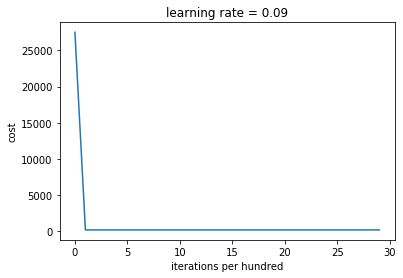

training set:
Accuracy on the given set: 28.631792238450007
dev set:
Accuracy on the given set: 28.47107278611894


In [102]:
parameters = model(X_train,Y_train)
print("training set:")
Y_p= predict(parameters['w'],parameters['b'],X_train,Y_train,True)
print("dev set:")
Y_p= predict(parameters['w'],parameters['b'],X_dev,Y_dev,True)
Y_p1= predict(parameters['w'],parameters['b'],X_test)

In [103]:
#using corelation method

w1 = np.sum((X_train-np.mean(X_train ,axis=1,keepdims=True))*(Y_train-np.mean(Y_train,keepdims=True)),axis=1,keepdims=True).T#
w2 = np.sum((X_train-np.mean(X_train,axis=1,keepdims=True))**2,axis=1,keepdims=True).T
w= w1/w2
b = np.mean(Y_train - np.dot(w,np.mean(X_train,axis=1,keepdims=True)))
Y_p2 = predict(w,b,X_train,Y_train,True)

Accuracy on the given set: 27.724128185405768


In [104]:
index = 0 #0 to 400
print ("prediction using gradient descent:",Y_p1[0][index])
print("prediction using correlation method:",Y_p2[0][index])

prediction using gradient descent: 113.86417456900551
prediction using correlation method: -58.12860086724928
